In [1]:
import pandas as pd
from PyPDF2 import PdfReader
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# install openpyxl 
# !pip install openpyxl # to read the excel file

# install html5lib 
# !pip install html5lib # to read the html file

# install PyPDF2
# !pip install PyPDF2

In [3]:
# read data files
airport_data = pd.read_excel('airports.xlsx')
flights_data = pd.read_excel('flights.xlsx')
planes_data = pd.read_html('planes.html')
airlines_data = pd.read_json('airlines.json')
pdf_weather_data = PdfReader('weather.pdf')

In [31]:
flights_data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2021,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2021-01-01T05:00:00Z
1,2021,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2021-01-01T05:00:00Z
2,2021,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2021-01-01T05:00:00Z
3,2021,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2021-01-01T05:00:00Z
4,2021,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2021-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252699,2021,7,3,1059,1100,-1,1214,1210,4,MQ,3230,N522MQ,JFK,DCA,51,213,11,0,2021-07-03T11:00:00Z
252700,2021,7,3,1059,1100,-1,1207,1213,-6,US,2171,N754UW,LGA,DCA,43,214,11,0,2021-07-03T11:00:00Z
252701,2021,7,3,1101,1110,-9,1305,1240,25,9E,3910,N813AY,JFK,RIC,61,288,11,10,2021-07-03T11:00:00Z
252702,2021,7,3,1105,1055,10,1435,1358,37,B6,971,N598JB,LGA,FLL,176,1076,10,55,2021-07-03T10:00:00Z


In [30]:
text = ''
for page in pdf_weather_data.pages:
    text += page.extract_text()

lines = text.split('\n')  # Séparer le texte par ligne
cleaned_lines = []

# Supprimer les lignes vides ou mal formatées
for line in lines:
    if len(line.split(',')) == 15:  # Vérifier si le nombre de colonnes est correct (15 colonnes)
        cleaned_lines.append(line)

# Rejoindre les lignes nettoyées
cleaned_text = "\n".join(cleaned_lines)
weather_data = pd.read_csv(StringIO(cleaned_text))

weather_data

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2021,1,1,0,37.04,21.92,53.97,230,10.357019999999999,11.918651475599997,0.0,1013.9,10.0,2021-01-01T00:00:00Z
1,EWR,2021,1,1,1,37.04,21.92,53.97,230,13.809359999999998,15.891535300799996,0.0,1013,10.0,2021-01-01T01:00:00Z
2,EWR,2021,1,1,2,37.94,21.92,52.09,230,12.658579999999999,14.567240692399997,0.0,1012.6,10.0,2021-01-01T02:00:00Z
3,EWR,2021,1,1,3,37.94,23.00,54.51,230,13.809359999999998,15.891535300799996,0.0,1012.7,10.0,2021-01-01T03:00:00Z
4,EWR,2021,1,1,4,37.94,24.08,57.04,240,14.960139999999999,17.215829909199996,0.0,1012.8,10.0,2021-01-01T04:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,EWR,2021,5,18,11,60.98,44.96,55.52,0,0,0,0.0,1025.5,10.0,2021-05-18T10:00:00Z
3097,EWR,2021,5,18,12,62.06,46.04,55.68,0,0,0,0.0,1025.8,10.0,2021-05-18T11:00:00Z
3098,EWR,2021,5,18,13,62.96,46.94,55.80,0,0,0,0.0,1026.2,10.0,2021-05-18T12:00:00Z
3099,EWR,2021,5,18,14,62.96,48.02,58.12,160,5.7539,6.621473041999999,0.0,1026.3,10.0,2021-05-18T13:00:00Z


### Information sur les dataframes

In [5]:
print(airlines_data.info())
print(flights_data.info())
print(airport_data.info())
print(planes_data[0].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   carrier  16 non-null     object
 1   name     16 non-null     object
dtypes: object(2)
memory usage: 384.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252704 entries, 0 to 252703
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year            252704 non-null  int64 
 1   month           252704 non-null  int64 
 2   day             252704 non-null  int64 
 3   dep_time        252704 non-null  object
 4   sched_dep_time  252704 non-null  int64 
 5   dep_delay       252704 non-null  object
 6   arr_time        252704 non-null  object
 7   sched_arr_time  252704 non-null  int64 
 8   arr_delay       252704 non-null  object
 9   carrier         252704 non-null  object
 10  flight          252704 non-null  int64 
 11 

1.	

In [32]:
airport_data

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst,tzone
0,0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...,...
1453,1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


In [6]:
nb_aeroports = airport_data.shape[0]
nb_arrivees = nb_departs = flights_data.shape[0]
nb_destinations = planes_data[0].shape[0]

print(f"Il y a {nb_aeroports} aéroports dans le fichier.")
print(f"Il y a {nb_departs} départs et {nb_arrivees} arrivées dans le fichier.")
print(f"Il y a {nb_destinations} destinations dans le fichier.")

# Quel est le nombre d'aéroports où on ne passe pas à l'heure d'été ?
# select count(*) from airport_data where dst = 'N'
nb_no_dst = airport_data[airport_data['dst'] == 'N'].shape[0]

print(f"Il y a {nb_no_dst} aéroports où on ne passe pas à l'heure d'été.")

# Quel est le nombre de fuseaux horaires ?
# select count(distinct tz) from airport_data
nb_fuseaux_horaire = airport_data['tzone'].nunique()

print(f"Il y a {nb_fuseaux_horaire} fuseaux horaires.")

# Quel est le nombre de compagnies ?
# select count(*) from airlines_data
nb_compagnies = airlines_data.shape[0]

print(f"Il y a {nb_compagnies} compagnies.")

# Quel est le nombre d'avions ?
# select count(*) from planes_data

nb_avions = planes_data[0].shape[0]

print(f"Il y a {nb_avions} avions.")

# Quel est le nombre de vols annulés ?
# select count(*) from flights_data where arr_delay = 'NA'
nb_vols_annules = flights_data[flights_data['arr_delay'] == ' '].shape[0]

print(f"Il y a {nb_vols_annules} vols annulés.")

Il y a 1458 aéroports dans le fichier.
Il y a 252704 départs et 252704 arrivées dans le fichier.
Il y a 3322 destinations dans le fichier.
Il y a 23 aéroports où on ne passe pas à l'heure d'été.
Il y a 10 fuseaux horaires.
Il y a 16 compagnies.
Il y a 3322 avions.
Il y a 7273 vols annulés.


2.	Quel est l’aéroport de départ le plus emprunté ?

In [7]:
# Quel est l’aéroport de destination le plus emprunté ?
flights_data.groupby('origin').size().idxmax()

'EWR'

In [8]:
# Quelles est le pourcentage de vols qui sont les 10 destinations les plus prisées ?
flights_data.merge(airport_data, left_on='dest', right_on='faa').groupby('name').size().nlargest(10) / flights_data.shape[0] * 100

name
Hartsfield Jackson Atlanta Intl       5.122990
Chicago Ohare Intl                    5.007440
Los Angeles Intl                      4.707088
General Edward Lawrence Logan Intl    4.574522
Orlando Intl                          4.209273
Charlotte Douglas Intl                4.134481
San Francisco Intl                    3.849959
Fort Lauderdale Hollywood Intl        3.736783
Miami Intl                            3.536944
Ronald Reagan Washington Natl         2.922787
dtype: float64

3.	Combien chaque compagnie a desservi de destination ; combien chaque compagnie a desservie de destination par aéroport d’origine. Réaliser les graphiques adéquats qui synthétisent ces informations ? 

In [9]:
flights_data.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2021,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2021-01-01T05:00:00Z
1,2021,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2021-01-01T05:00:00Z
2,2021,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2021-01-01T05:00:00Z
3,2021,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2021-01-01T05:00:00Z
4,2021,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2021-01-01T06:00:00Z


In [10]:
# Combien chaque compagnie a desservi de destination
num_destinations = flights_data.groupby('carrier')['dest'].nunique().reset_index(name='num_destinations')
num_destinations

,carrier,num_destinations
0,9E,47
1,AA,19
2,AS,1
3,B6,42
4,DL,40
5,EV,61
6,F9,1
7,FL,3
8,HA,1
9,MQ,20


In [11]:
# combien chaque compagnie a desservie de destination par aéroport d’origine.
num_destinations_ori = flights_data.groupby(['carrier', 'origin'])['dest'].nunique().reset_index(name='num_destinations')
num_destinations_ori

,carrier,origin,num_destinations
0,9E,EWR,4
1,9E,JFK,34
2,9E,LGA,36
3,AA,EWR,3
4,AA,JFK,17
5,AA,LGA,5
6,AS,EWR,1
7,B6,EWR,7
8,B6,JFK,42
9,B6,LGA,6


In [12]:
# Réaliser les graphiques adéquats qui synthétisent ces informations
pivot_data_ori = num_destinations_ori.pivot(index='origin', columns='carrier', values='num_destinations').sort_values(by='origin', ascending=False)
pivot_data_ori

carrier,9E,AA,AS,B6,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
origin,,,,,,,,,,,,,,,,
LGA,36.0,5.0,NaN,6.0,22.0,45.0,1.0,3.0,NaN,12.0,2.0,4.0,4.0,NaN,8.0,3.0
JFK,34.0,17.0,NaN,42.0,29.0,3.0,NaN,NaN,1.0,11.0,NaN,2.0,3.0,5.0,NaN,NaN
EWR,4.0,3.0,1.0,7.0,4.0,53.0,NaN,NaN,NaN,1.0,2.0,45.0,2.0,2.0,9.0,NaN


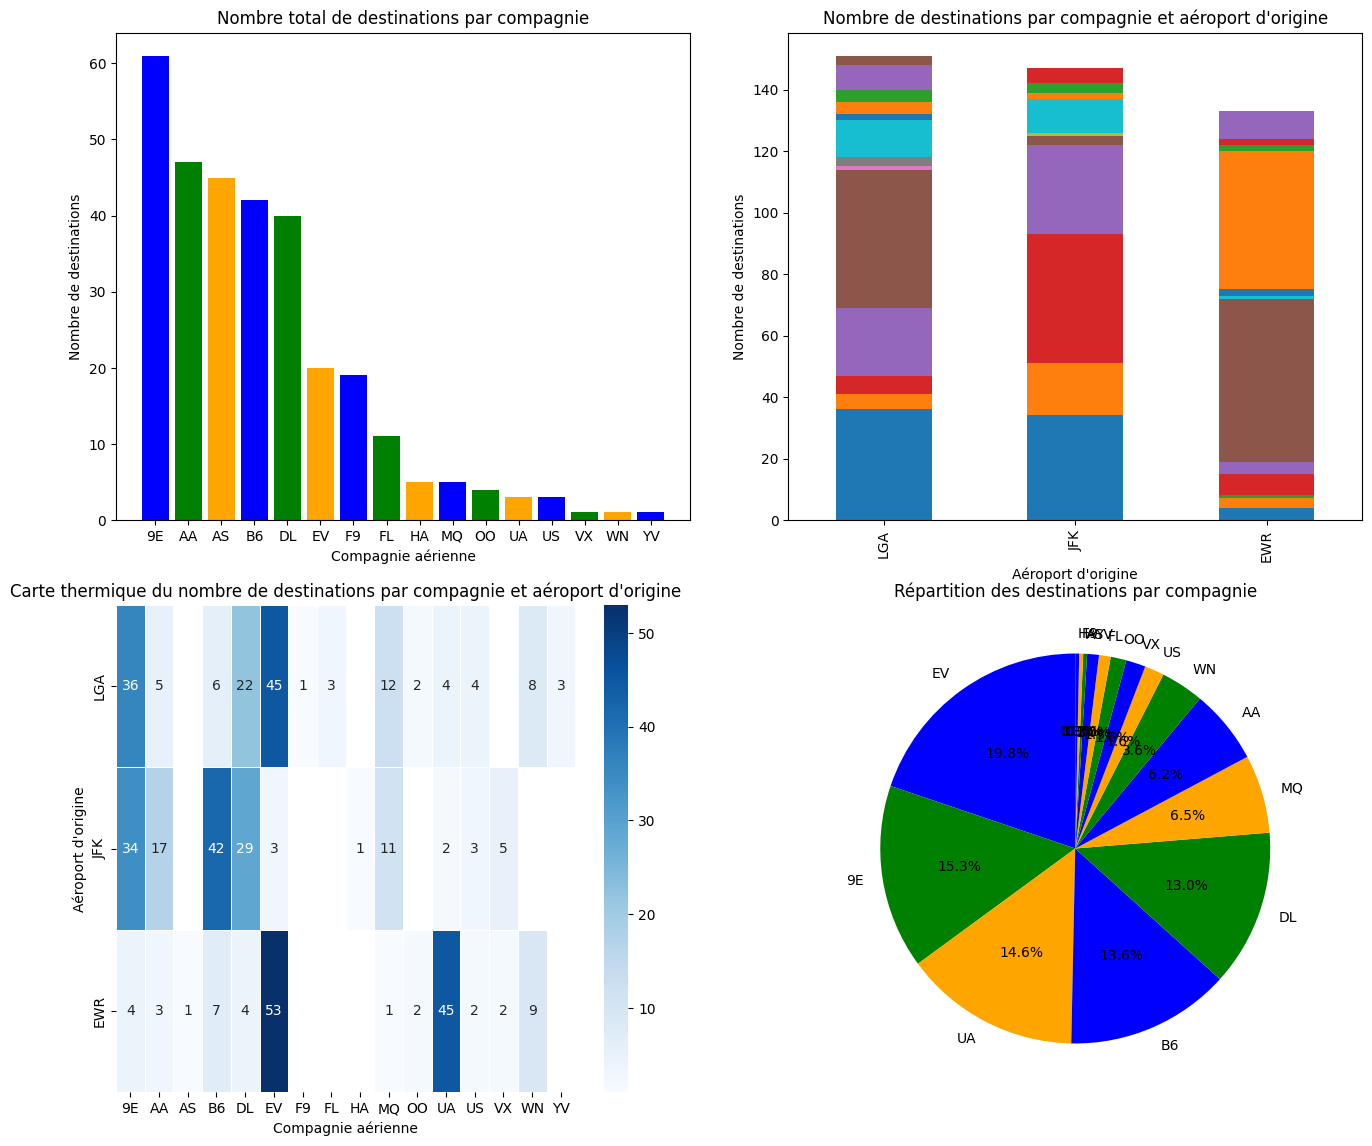

In [13]:
pie_data = num_destinations.set_index('carrier')['num_destinations'].sort_values(ascending=False)

# Creating a new figure for the pie chart and dashboard
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Adjusting layout
plt.tight_layout(pad=4.0)

# ------------------------------
# 1. Barplot for num_destinations
# ------------------------------
axs[0, 0].bar(num_destinations['carrier'], num_destinations['num_destinations'].sort_values(ascending=False), color=['blue', 'green', 'orange'])
axs[0, 0].set_title("Nombre total de destinations par compagnie")
axs[0, 0].set_xlabel("Compagnie aérienne")
axs[0, 0].set_ylabel("Nombre de destinations")

# ------------------------------
# 2. Stacked Barplot for num_destinations_ori
# ------------------------------
pivot_data_ori.plot(kind='bar', stacked=True, ax=axs[0, 1], legend=False)
axs[0, 1].set_title("Nombre de destinations par compagnie et aéroport d'origine")
axs[0, 1].set_xlabel("Aéroport d'origine")
axs[0, 1].set_ylabel("Nombre de destinations")

# ------------------------------
# 3. Heatmap for num_destinations_ori
# ------------------------------
sns.heatmap(pivot_data_ori, annot=True, cmap='Blues', linewidths=.5, ax=axs[1, 0])
axs[1, 0].set_title("Carte thermique du nombre de destinations par compagnie et aéroport d'origine")
axs[1, 0].set_xlabel("Compagnie aérienne")
axs[1, 0].set_ylabel("Aéroport d'origine")

# ------------------------------
# 4. Pie Chart for num_destinations
# ------------------------------
axs[1, 1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'orange'])
axs[1, 1].set_title("Répartition des destinations par compagnie")

plt.show()

4.	Trouver tous les vols ayant atterri à Houston (IAH ou HOU) ? Combien de vols partent de NYC airports vers Seattle, combien de compagnies desservent cette destination et combien d’avions “uniques” ? 

In [14]:
# Trouver tous les vols ayant atterri à Houston (IAH ou HOU) ?

#houston_arr = flights_data[(flights_data['dest'] == 'IAH') | (flights_data['dest'] == 'HOU')].shape[0]
houston_arr = flights_data[(flights_data['dest'].isin(['IAH', 'HOU']))].shape[0]


print(f"Il y a {houston_arr} vols ayant atterri à Houston")

# Combien de vols partent de NYC airports vers Seattle ?

#nyc_to_seattle = flights_data[(flights_data['dest'] == 'SEA') & ((flights_data['origin'] == 'EWR') | (flights_data['origin'] == 'JFK') | (flights_data['origin'] == 'LGA') | (flights_data['origin'] == 'SWF'))].shape[0]
nyc_to_seattle = flights_data[(flights_data['dest'] == 'SEA')].shape[0]

print(f"Il y a {nyc_to_seattle} vols qui partent de NYC airports vers Seattle")

# Combien de compagnies desservent cette destination ?

dest_seattle = flights_data[(flights_data['dest'] == 'SEA')].carrier.unique()

print(f"Il y a {dest_seattle} compagnies qui desservent cette destination")

# Combien d’avions “uniques” ?
uni_avions = flights_data[(flights_data['dest'] == 'SEA')].tailnum.nunique()

print(f"Il y a {uni_avions} avions “uniques”")

Il y a 6958 vols ayant atterri à Houston
Il y a 2736 vols qui partent de NYC airports vers Seattle
Il y a ['AS' 'DL' 'UA' 'B6' 'AA'] compagnies qui desservent cette destination
Il y a 857 avions “uniques”


In [15]:
airlines_data

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


5.	Trouver le nombre de vols par destination ? Trier les vols suivant la destination, l’aéroport d’origine, la compagnie dans un ordre alphabétique croissant (en réalisant les jointures nécessaires pour obtenir les noms explicites des aéroports) ?

In [16]:
# Trouver le nombre de vols par destination
flights_data.groupby('dest').size()

dest
ABQ      164
ACK       92
ALB      386
ATL    12946
AUS     1826
       ...  
TPA     5682
TUL      239
TVC       16
TYS      481
XNA      782
Length: 103, dtype: int64

In [17]:
# Trier par dest, origin, compagnie

In [18]:
flights_data.merge(airlines_data, left_on='carrier', right_on='carrier').sort_values(['dest', 'origin', 'name'])

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
73310,2021,10,1,1955,2001,-6,2213,2248,-35,B6,65,N554JB,JFK,ABQ,230,1826,20,1,2021-10-01T20:00:00Z,JetBlue Airways
73449,2021,10,2,2010,2001,9,2230,2248,-18,B6,65,N607JB,JFK,ABQ,238,1826,20,1,2021-10-02T20:00:00Z,JetBlue Airways
73593,2021,10,3,1955,2001,-6,2232,2248,-16,B6,65,N591JB,JFK,ABQ,251,1826,20,1,2021-10-03T20:00:00Z,JetBlue Airways
73744,2021,10,4,2017,2001,16,2304,2248,16,B6,65,N662JB,JFK,ABQ,257,1826,20,1,2021-10-04T20:00:00Z,JetBlue Airways
73877,2021,10,5,1959,1959,0,2226,2246,-20,B6,65,N580JB,JFK,ABQ,242,1826,19,59,2021-10-05T19:00:00Z,JetBlue Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205864,2021,7,2,702,710,-8,911,915,-4,MQ,3547,N721MQ,LGA,XNA,161,1147,7,10,2021-07-02T07:00:00Z,Envoy Air
205898,2021,7,2,1519,1525,-6,1728,1740,-12,MQ,3532,N720MQ,LGA,XNA,164,1147,15,25,2021-07-02T15:00:00Z,Envoy Air
205912,2021,7,2,1751,1755,-4,2015,2010,5,MQ,3367,N713MQ,LGA,XNA,170,1147,17,55,2021-07-02T17:00:00Z,Envoy Air
205944,2021,7,3,657,710,-13,902,915,-13,MQ,3547,N725MQ,LGA,XNA,164,1147,7,10,2021-07-03T07:00:00Z,Envoy Air


6.	Quelles sont les compagnies qui n'opèrent pas sur tous les aéroports d’origine ? Quelles sont les compagnies qui desservent l’ensemble de destinations ?
Faire un tableau où l’on récupère l’ensemble des origines et des destinations pour l’ensemble des compagnies. 


In [19]:
# Quelles sont les compagnies qui n'opèrent pas sur tous les aéroports d’origine ?

all_origin_airports = set(flights_data['origin'].unique())

carrier_origins = flights_data.groupby('carrier')['origin'].unique()

airlines_not_on_all_origins = carrier_origins[carrier_origins.apply(lambda origins: set(origins) != all_origin_airports)]

airlines_not_on_all_origins

carrier
AS         [EWR]
F9         [LGA]
FL         [LGA]
HA         [JFK]
OO    [LGA, EWR]
VX    [JFK, EWR]
WN    [LGA, EWR]
YV         [LGA]
Name: origin, dtype: object

In [20]:
# Quelles sont les compagnies qui desservent l’ensemble de destinations ?

all_dest_airports = set(flights_data['dest'].unique())

carrier_dests = flights_data.groupby('carrier')['dest'].unique()

airlines_not_on_all_dests = carrier_dests[carrier_dests.apply(lambda dests: set(dests) == all_dest_airports)]

airlines_not_on_all_dests

Series([], Name: dest, dtype: object)

In [21]:
airport_data

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst,tzone
0,0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...,...
1453,1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


7.	Quelles sont les destinations qui sont exclusives à certaines compagnies ? 

In [22]:
destinations_by_carrier = flights_data.groupby('carrier')['dest'].unique().reset_index()

destinations_expanded = flights_data[['dest', 'carrier']]

destination_counts = destinations_expanded.groupby('dest')['carrier'].nunique().reset_index()

# Filtrer pour garder uniquement les destinations desservies par une seule compagnie
exclusive_destinations = destination_counts[destination_counts['carrier'] == 1]

# Joindre pour obtenir les compagnies qui desservent ces destinations exclusives
exclusive_with_carrier = exclusive_destinations.merge(destinations_expanded, on='dest')

# Renommer les colonnes pour plus de clarté
exclusive_with_carrier = exclusive_with_carrier[['dest', 'carrier_y']].drop_duplicates().rename(columns={'carrier_y': 'carrier'})


# Afficher les résultats
print("Destinations exclusives par compagnie :")
exclusive_with_carrier


Destinations exclusives par compagnie :


,dest,carrier
0,ABQ,B6
164,ACK,B6
256,ALB,EV
642,BHM,EV
857,BUR,B6
1138,BZN,UA
1158,CAK,FL
1780,CHO,EV
1811,CRW,MQ
1949,EYW,DL


8.      Filtrer le vol pour trouver ceux exploités par United, American ou Delta ?


In [23]:
united = flights_data[flights_data['carrier'] == 'UA'].shape[0]

print(f"Il y a {united} vols utilisant United")

american = flights_data[flights_data['carrier'] == 'AA'].shape[0]

print(f"Il y a {american} vols utilisant American")

delta = flights_data[flights_data['carrier'] == 'DL'].shape[0]

print(f"Il y a {delta} vols utilisant Delta")


Il y a 44165 vols utilisant United
Il y a 24602 vols utilisant American
Il y a 35975 vols utilisant Delta


## Mission 03

In [ ]:
#!pip install Flask

lien pour accéder à la webapp flask

In [27]:
from flask import Flask, render_template, send_file
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Créer l'application Flask
app = Flask(__name__, template_folder='static/templates')

if not os.path.exists('static/images'):
    os.makedirs('static/images')

@app.route('/')

def hello():

    # Creating a new figure for the pie chart and dashboard
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))

    # Adjusting layout
    plt.tight_layout(pad=4.0)

    # ------------------------------
    # 1. Barplot for num_destinations
    # ------------------------------
    axs[0, 0].bar(num_destinations['carrier'], num_destinations['num_destinations'].sort_values(ascending=False), color=['blue', 'green', 'orange'])
    axs[0, 0].set_title("Nombre total de destinations par compagnie")
    axs[0, 0].set_xlabel("Compagnie aérienne")
    axs[0, 0].set_ylabel("Nombre de destinations")

    # ------------------------------
    # 2. Stacked Barplot for num_destinations_ori
    # ------------------------------
    pivot_data_ori.plot(kind='bar', stacked=True, ax=axs[0, 1], legend=False)
    axs[0, 1].set_title("Nombre de destinations par compagnie et aéroport d'origine")
    axs[0, 1].set_xlabel("Aéroport d'origine")
    axs[0, 1].set_ylabel("Nombre de destinations")

    # ------------------------------
    # 3. Heatmap for num_destinations_ori
    # ------------------------------
    sns.heatmap(pivot_data_ori, annot=True, cmap='Blues', linewidths=.5, ax=axs[1, 0])
    axs[1, 0].set_title("Carte thermique du nombre de destinations par compagnie et aéroport d'origine")
    axs[1, 0].set_xlabel("Compagnie aérienne")
    axs[1, 0].set_ylabel("Aéroport d'origine")

    # ------------------------------
    # 4. Pie Chart for num_destinations
    # ------------------------------
    pie_data = num_destinations.set_index('carrier')['num_destinations'].sort_values(ascending=False)
    axs[1, 1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'orange'])
    axs[1, 1].set_title("Répartition des destinations par compagnie")

    # Enregistrer le graphique sous forme d'image
    image_path = "static/images/dashboard.png"
    plt.savefig(image_path)
    plt.close()

    return render_template("dashboard.html", image_path=image_path)



# Lancer l'application dans Deepnote
if __name__ == "__main__":
    app.run(host='0.0.0.0', port=8080)

 * Serving Flask app '__main__'
 * Debug mode: off
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://172.3.62.230:8080
Press CTRL+C to quit
172.3.182.236 - - [24/Oct/2024 14:13:00] "GET / HTTP/1.1" 200 -
172.3.31.177 - - [24/Oct/2024 14:13:00] "GET /static/images/dashboard.png HTTP/1.1" 200 -
172.3.31.177 - - [24/Oct/2024 14:25:34] "GET / HTTP/1.1" 200 -
172.3.31.177 - - [24/Oct/2024 14:25:35] "GET /static/images/dashboard.png HTTP/1.1" 200 -
172.3.33.186 - - [24/Oct/2024 14:25:35] "GET /favicon.ico HTTP/1.1" 404 -


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=36af6df1-744c-45ad-80dd-7efe5fea58f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>